In [62]:
from keras.layers import Layer
from keras import backend as K
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.datasets import mnist
import pandas as pd
from keras.losses import binary_crossentropy
from keras.utils import to_categorical
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

In [63]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# normalization
x_train = X_train.reshape(60000,784)/255
x_test = X_test.reshape(10000,784)/255

In [64]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [68]:
model = Sequential()
model.add(Dense(28*28))
model.add(RBFLayer(30, 0.5))
model.add(Dense(10, activation='softmax', name='foo'))

weights = []
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: weights.append(model.get_weights()))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
# training
history1=model.fit(
  x_train,
  to_categorical(Y_train),
  batch_size=100,
  epochs=20,
  validation_data=(x_test, to_categorical(Y_test)),
  callbacks = [print_weights]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 2.1078 - accuracy: 0.1966 - val_loss: 2.0103 - val_accuracy: 0.2261
Epoch 2/20
60000/60000 [==============================] - 9s 144us/step - loss: 1.9844 - accuracy: 0.2518 - val_loss: 1.9207 - val_accuracy: 0.2976
Epoch 3/20
60000/60000 [==============================] - 9s 144us/step - loss: 1.8746 - accuracy: 0.3142 - val_loss: 1.7008 - val_accuracy: 0.3840
Epoch 4/20
60000/60000 [==============================] - 9s 142us/step - loss: 1.6841 - accuracy: 0.4025 - val_loss: 1.7739 - val_accuracy: 0.3883
Epoch 5/20
60000/60000 [==============================] - 9s 145us/step - loss: 1.5073 - accuracy: 0.4762 - val_loss: 1.6059 - val_accuracy: 0.4659
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 1.4205 - accuracy: 0.5058 - val_loss: 1.1917 - val_accuracy: 0.6086
Epoch 7/20
60000/60000 [==============================] - 9s 1

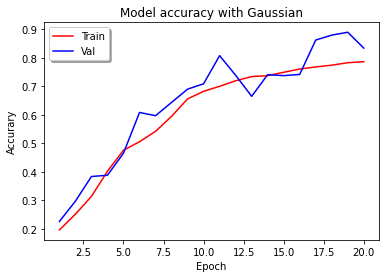

In [71]:
# model 1 Accuracy
x = []
for i in range(20):
    x.append(i+1)
    
y_train = history1.history['accuracy']
y_val = history1.history['val_accuracy']
plt.title("Model accuracy with Gaussian") 
plt.xlabel("Epoch") 
plt.ylabel("Accurary")
plt.plot(x,y_train,'-',color='red',label='Train')
plt.plot(x,y_val,'-',color='blue',label='Val')
plt.legend(loc='upper left', shadow=True)